# Final project Scientific Programming with Python
#### By itamar yarden  - 204289987

## Installation and import in order to use this program


In [451]:
# !pip install numpy
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib
# !pip install seaborn
# !pip install sklearn
# !pip install scipy
# !pip install pydotplus

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import sklearn as skl
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pydotplus


## Task 1 - Intro

In this section I will review the data, explain and analyse the different usages of its features.



#### Overview  

The dataset for this project is about different types of energy, their costs due to different usages and different environments. In order to collect the data we can see that the researchers had done it over a long period of time (10 years), testing all kinds of parameters (14). 





 
 

#### Features

Now I will explore the features, thier types, and values. for this I will seperate them into categorical and numerical featues.

- Measure: it is used as an index, each measure specifies a specific observation of some building in a specific district at a specific time(year and month), therefore each measure has a uinique value. It is noted with  integer.

#### Categorical features:

- Month: The month the observation was made at, this value is ordinal because we can arrange month in an inner order from 1 to 12.

- Sector: This parameter denotes the sector the observation belongs to. It is a nominal feature, every value has its own name without inner order to them. 
values are:  factory/commercial/education/office/residential.

- District: A parameter to denote the district the observation was taken at. It is a nominal feature, there is no inner order to the district and we can call them by name.
Values are: 1 to 8.   

#### Numerical features:

- Year:  The year that the observation was made at, this feature is continious because there is not finite value to years. 

- Size: The square size of a floor, it does not denotes the total size of a building only the square size of floor, it is a continious value because we can always measure a bigger floor size.

- Elevation: The ground elevation at the building's location, it is a continious data type for the infinte range of its values.

- Floors: This feature denotes the amount of floors in a observation building, because it represent the amount it is a numerical feature with a discrete value.

- Built: A feature to denote the year the building was built, since its value is in years it is a continious feature like 'year' feature.

- Tmp_min (minimum tempature): A feature to specify the minum tempature measure that was taken at this observation location, tempature can measured on a scale therefore it is a a continious feature type.

- Tmp_max (maximum tempature): A feature to specify the maximum tempature measure that was taken at this observation location, tempature can measured on a scale therefore it is a a continious feature type.

- Tmp_mean (mean tempature): A feature to specify the mean tempature measure that was taken at this observation location, its value will be between the min and max value, tempature can measured on a scale therefore it is a a continious feature type.

- Cost: A feature to denote the cost of the observation (heating cost of a specific building on a month on some year), because we can measure different costs on a scale the feature is of type numerical continious.

#### Target feature

- Source: This feature is the target of the data set, by using this feature we can learn how to classify any new observation. It's of type categorical nominal feature. 
Values: gas, oil, electricity. 

### Overview on the data

In order to review some meta data on the dataset that was given to me I will read the data using python pandas dataframe and present some minor analyses.

In [452]:
energy_df = pd.read_csv('energy_source3.csv')

In [453]:
#changing the feature size name to floor_size to avoid collisions with the function size of data frame
energy_df.rename(columns={'size': 'floor_size'}, inplace=True)

#Count of all observation
print('Total number of observations: ' , len(energy_df.index),'\n')

#Count of every feature and number of total values
print('Number of values for each feature in the dataset:')
print(energy_df.count(),'\n')


#The different types of the dataframes
print('Feature types represntation:')
print(energy_df.dtypes)

Total number of observations:  36000 

Number of values for each feature in the dataset:
measure       36000
year          36000
month         36000
sector        34595
floor_size    35458
district      36000
elevation     36000
floors        36000
built         36000
tmp_min       36000
tmp_mean      34575
tmp_max       34649
cost          35384
source        36000
dtype: int64 

Feature types represntation:
measure         int64
year            int64
month         float64
sector         object
floor_size    float64
district        int64
elevation     float64
floors          int64
built           int64
tmp_min       float64
tmp_mean      float64
tmp_max       float64
cost          float64
source         object
dtype: object


## Intro summarize

After revewing the meta data of the Energy data set we can see that there is some data scrubing needs to be done.
we can see that we have 3 categorical features. the 'sector' feature will need to have encoding from string value to integer. 

Dealing with missing values -  one of the main issues dealing with raw data is that it contains missing values,
there are several types of missing values and many different approachs of dealing with it. 
Reviewing the data before start handling with it gives us a better prespective of it and can help us decide what to do with those values.
We can see that there are some features with missing values, for each feature we will have to decide weather it is best to drop that entire observation or filling in the missing values with the mean/median value of the feature (if it is a numerical feature) or with mode value of the feature (if it a categorical feature).

Other type of missing values is one where the data is filled with wrong values. 
from reviewing the data we can see that:
-  month: has a value of 22 in some rows, that is not right because we have 12 months in a year.


In the next chapter I will review other features that are candidte of having 'garbage' values.
- for size (floor size) the values range is between 129 and 5947 which sounds like to much and needs to be examined.
- for the tempature minimum, maximum and mean I will check if for any observation the mean is between min and max, and also that the min and max do not exceed each other.


## Task 2 - Initial Data Analysis

In this section I will handle the data and preform data scrubing, handling missing and incorrect values.
In the previous section i've mentioned the features that are having missing/incorrect data.
Inorder to get the best result I will review each feature and  decide how to cope with it. 

### Month 


In [454]:
# Examining how many values are incorrect
agg = energy_df.groupby(['year','month']).agg('count')

#reviewing every (year,moth) index in the groupby table
years = [2014,2013,2010,2008,2006,2005]
months =  [1,2,3,4,5,6,7,8,9,10,11,12,22]
dict_tup = {}
for year in years:
    tmp_list = []
    for month in months:
        tmp_list.append(tuple([year,month]))
    dict_tup[year] = tmp_list
    print(agg[agg.index.isin(tmp_list)].measure)


year  month
2014  1.0      300
      2.0      300
      3.0      300
      4.0      300
      5.0      300
      6.0      299
      7.0      300
      8.0      300
      9.0      300
      10.0     300
      11.0     300
      12.0     299
      22.0       2
Name: measure, dtype: int64
year  month
2013  1.0      300
      2.0      299
      3.0      299
      4.0      300
      5.0      300
      6.0      300
      7.0      300
      8.0      300
      9.0      300
      10.0     300
      11.0     300
      12.0     300
      22.0       2
Name: measure, dtype: int64
year  month
2010  1.0      299
      2.0      300
      3.0      300
      4.0      299
      5.0      300
      6.0      300
      7.0      300
      8.0      300
      9.0      300
      10.0     300
      11.0     300
      12.0     300
      22.0       2
Name: measure, dtype: int64
year  month
2008  1.0      300
      2.0      300
      3.0      300
      4.0      300
      5.0      300
      6.0      300
      7.0    

Now I can see that there are 11 wrong values.
Inorder to correct them into to thier right value.
In a year that has the month '22' appeared in it and a another with same number of missing value I will transform 22 into this number.
For all the years that has the month '22' and it is split between different month, I will complete this by comapring the mean_tmp.

In [455]:

#For every month in a certain year that has the same missing value as appeared in 'month-22' value, replace it with this month value (i.e if a month 22 in year 2005 has 2 value and month 1 in year 2005 has 2 missing value replace 22 with 1)

#for 2005
replace_month = energy_df[energy_df.year.eq(2005) & energy_df.month.eq(22)]
energy_df[energy_df.year.eq(2005) & energy_df.month.eq(22)] = replace_month.replace(22,1)

#for 2008 

replace_month =  energy_df[energy_df.year.eq(2008) & energy_df.month.eq(22)]
energy_df[energy_df.year.eq(2008) & energy_df.month.eq(22)] = replace_month.replace(22,12)

#For every month in a certain year that does not have the same missing value as appeared in 'month-22' value, I will replace after comparing to this month in another year observation (based on year, district and mean_tmp)

#2006
replace_month =  energy_df[energy_df.year.eq(2006) & energy_df.month.eq(22) & energy_df.district.eq(1)]
energy_df[energy_df.year.eq(2006) & energy_df.month.eq(22) & energy_df.district.eq(1)] = replace_month.replace(22,6)
replace_month =  energy_df[energy_df.year.eq(2006) & energy_df.month.eq(22) & energy_df.district.eq(5)]
energy_df[energy_df.year.eq(2006) & energy_df.month.eq(22) & energy_df.district.eq(5)] = replace_month.replace(22,5)

#2010
replace_month =  energy_df[energy_df.year.eq(2010) & energy_df.month.eq(22) & energy_df.district.eq(8)]
energy_df[energy_df.year.eq(2010) & energy_df.month.eq(22) & energy_df.district.eq(8)] = replace_month.replace(22,1)
replace_month =  energy_df[energy_df.year.eq(2010) & energy_df.month.eq(22) & energy_df.district.eq(6)]
energy_df[energy_df.year.eq(2010) & energy_df.month.eq(22) & energy_df.district.eq(6)] = replace_month.replace(22,4)

#2013
replace_month =  energy_df[energy_df.year.eq(2013) & energy_df.month.eq(22) & energy_df.district.eq(2)]
energy_df[energy_df.year.eq(2013) & energy_df.month.eq(22) & energy_df.district.eq(2)] = replace_month.replace(22,2)
replace_month =  energy_df[energy_df.year.eq(2013) & energy_df.month.eq(22) & energy_df.district.eq(5)]
energy_df[energy_df.year.eq(2013) & energy_df.month.eq(22) & energy_df.district.eq(5)] = replace_month.replace(22,3)

#2014
replace_month =  energy_df[energy_df.year.eq(2014) & energy_df.month.eq(22) & energy_df.elevation.eq(12)]
energy_df[energy_df.year.eq(2014) & energy_df.month.eq(22) & energy_df.elevation.eq(12)] = replace_month.replace(22,6)
replace_month =  energy_df[energy_df.year.eq(2014) & energy_df.month.eq(22) & energy_df.elevation.eq(337)]
energy_df[energy_df.year.eq(2014) & energy_df.month.eq(22) & energy_df.elevation.eq(337)] = replace_month.replace(22,12)

print(len(energy_df))


36000


### Sector

This feature is categorical feature, its values are factory,commercial,education,office,residential.

As presented above this feature has 1405 missing values (np.nan).


I will review the distribution of its unique values, And will decide how to handle those 1405 missing values.


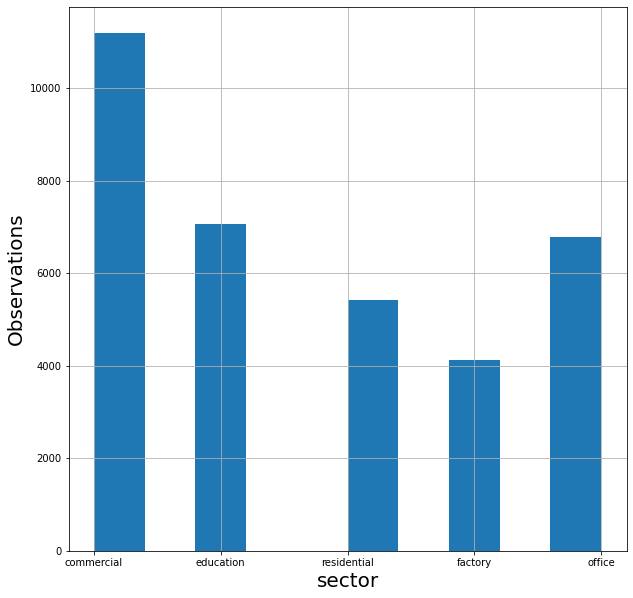

In [456]:
#creating an histogram for this feature to present the distribution of its values.
plt.figure(figsize= [10,10])
energy_df.sector.hist()
plt.xlabel('sector', size = 20)
plt.ylabel('Observations', size = 20)
plt.show()


We can see now that most of its values are commerical.

There are several ways to handle categorical missing data, 


because the number of observation having 'sector' missing as data is not too high I will use the mode function to fill those values.

In [457]:
#Filling missing values with mode function
energy_df.sector = energy_df.sector.fillna(energy_df.sector.mode()[0])
print(len(energy_df))

36000


### Size (floor size)

This feature is numerical and describing the floor size of a building.

It has 542 missing values, which is a low amount compared the entire data (36K values).

I will again review its value distrbuation and decide how to handle these missing values.

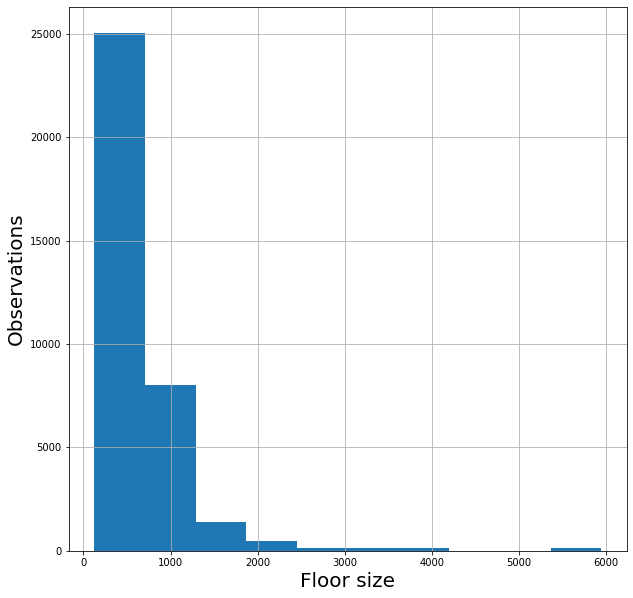

In [458]:
#Creating an histogram of floor size feature
plt.figure(figsize= [10,10])
energy_df.floor_size.hist()
plt.xlabel('Floor size', size = 20)
plt.ylabel('Observations', size = 20)
plt.show()

Most of the values distrbuation is at lower bound of the values.


I will use either mean, or median in order to fill the missing data.

for that I will review both options and how they will correlate to the target value.

In [459]:
print('Floor size median value: ' , energy_df.floor_size.median())
print('Floor size mean value: ' ,energy_df.floor_size.mean())

#creating temporary list the floor size feature filled in with missing values by mean function
tmp_mean = energy_df.floor_size.fillna(energy_df.floor_size.mean())

#creating temporary list the floor size feature filled in with missing values by median function
tmp_median = energy_df.floor_size.fillna(energy_df.floor_size.median())


#creating a numeric feature transformation of the target feature
group_list = []
uniqueSourceValues = energy_df.source.unique()
for val in uniqueSourceValues:
    group_list.append(val)

energy_df["source_transformed"] = pd.Categorical(energy_df.source, ordered=True, categories=group_list).codes + 1

print("Correlation between target value-sorce and floor size(mean) : ", energy_df['source_transformed'].corr(tmp_mean))

print("Correlation between target value-sorce and floor size(median): ", energy_df['source_transformed'].corr(tmp_median))

print("Correlation between target value-sorce and floor size(origial with missing values): ", energy_df['source_transformed'].corr(energy_df.floor_size))

print(len(energy_df))

Floor size median value:  497.0
Floor size mean value:  656.6619098651926
Correlation between target value-sorce and floor size(mean) :  -0.021934150232355426
Correlation between target value-sorce and floor size(median):  -0.02183034507970302
Correlation between target value-sorce and floor size(origial with missing values):  -0.022103667525787088
36000


Now we can see that either way it doesn't metter at all, becasue the missing values are so few compared to the data size and 
so I will choose to fill the missing values with mean.

In [460]:
energy_df.floor_size = energy_df.floor_size.fillna(energy_df.floor_size.mean())

### The tempature feature (min, mean, max)
These features will require a deeper observation of thier content and the relation between one to another.
Becasue the mean_tmp relays on max and min tempature, first I will look for observation with missing mean and max.
if a combination of this features will be missing we won't be able to complete it proply.
(i.e for an observation, if the mean value is missing we can compelete it based on the max and min tempatures of that observation).


In [461]:
#presenting the observation with missing with two features or more (from the min/mean/max tempature features).
print('Number of missing values for both tmp_mean and tmp_max: ',len(energy_df[energy_df.tmp_max.isna() & energy_df.tmp_mean.isna()]))

#Because this is a small number of observations we will delete all these rows
energy_df = energy_df[energy_df.tmp_max.notna() | energy_df.tmp_mean.notna()]

Number of missing values for both tmp_mean and tmp_max:  55


Now I will complete the missing for max tempature where I have min and mean tempature,
and the mean tempature where I have min and max tempature. 

In [470]:
#Completing missing values for the tmp_mean feature according to this ---> tmp_min[i] + tmp_max[i]
#                                                                          ----------------------- = tmp_mean[i]
#                                                                                     2
energy_df['tmp_mean'] = energy_df['tmp_mean'].fillna((energy_df['tmp_min']+energy_df['tmp_max'])/2)
energy_df.to_csv('filled_mean.csv')


#Completing missing values for the tmp_mean feature according to this ---> tmp_max[i] = 2*tmp_mean[i] - tmp_min[i]
# energy_df['tmp_max'] = energy_df['tmp_max'].fillna(energy_df['tmp_mean'*2 - energy_df['tmp_min'])
tmp = energy_df
tmp['filled_max'] = energy_df['tmp_max'].fillna(energy_df['tmp_mean']*2 - energy_df['tmp_min'])
tmp.to_csv('filled_max.csv')

In [464]:
print("Corr between min_tmp and mean_tmp: ", energy_df['tmp_mean'].corr(energy_df["tmp_min"]))
print("Corr between min_tmp and mean_tmp: ", energy_df['tmp_mean'].corr(energy_df["tmp_max"]))
print("Corr between min_tmp and mean_tmp: ", energy_df['tmp_min'].corr(energy_df["tmp_max"]))


Corr between min_tmp and mean_tmp:  0.969419042786007
Corr between min_tmp and mean_tmp:  0.9649322331469427
Corr between min_tmp and mean_tmp:  0.9271813886968788
